<a href="https://colab.research.google.com/github/shivendr7/ml/blob/assignments/ConvolutionWithFilters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
import numpy as np
import requests
from PIL import Image, ImageFile
from io import BytesIO

In [141]:
url="https://gh.cdn.sewest.net/assets/ident//news/d81c6286/Avenger_Blog_IronMan_Artwork_3-663lb99uz.jpg?quality=65&width=1280px&height=720px"
response= requests.get(url)
img=Image.open(BytesIO(response.content))
#img.load()


In [142]:
img.convert("L")
imgar=np.asarray(img)

In [125]:
def convolve2D(img, kernel, padding=0, strides=1):
  kernel = np.flipud(np.fliplr(kernel))

  xkernshape=kernel.shape[0]
  ykernshape=kernel.shape[1]
  ximgshape=img.shape[0]
  yimgshape=img.shape[1]

  xoutput=int((ximgshape-xkernshape+2*padding)/strides)+1
  youtput=int((yimgshape-ykernshape+2*padding)/strides)+1
  output=np.zeros((xoutput,youtput))

  if padding!=0:
    padimg=np.array((img.shape[0]+padding*2, img.shape[1]+padding*2))
    padimg[padding:-padding, padding:-padding]=img
  else:
    padimg=img
  
  for y in range(img.shape[1]-ykernshape):
    if y% strides ==0:
      for x in range(img.shape[0]-xkernshape):
        
          if x% strides==0:
            output[x,y]=(kernel*padimg[x:x+xkernshape, y:y+ykernshape]).sum()
        
  return output

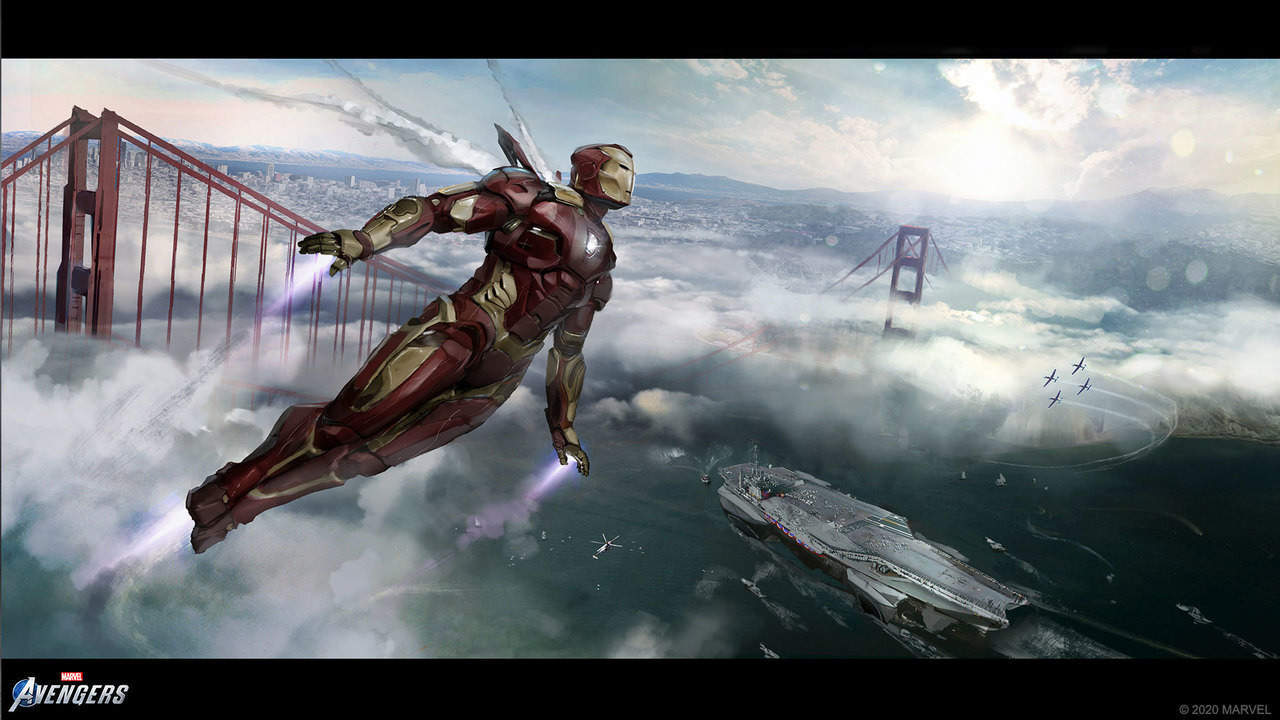

In [150]:
normimg=np.zeros((imgar.shape[0],imgar.shape[1]))
for x in range(imgar.shape[0]):
  for y in range(imgar.shape[1]):
    normimg[x,y]=np.array(imgar[x,y].mean())


In [151]:
normimg=normimg.astype('uint8')

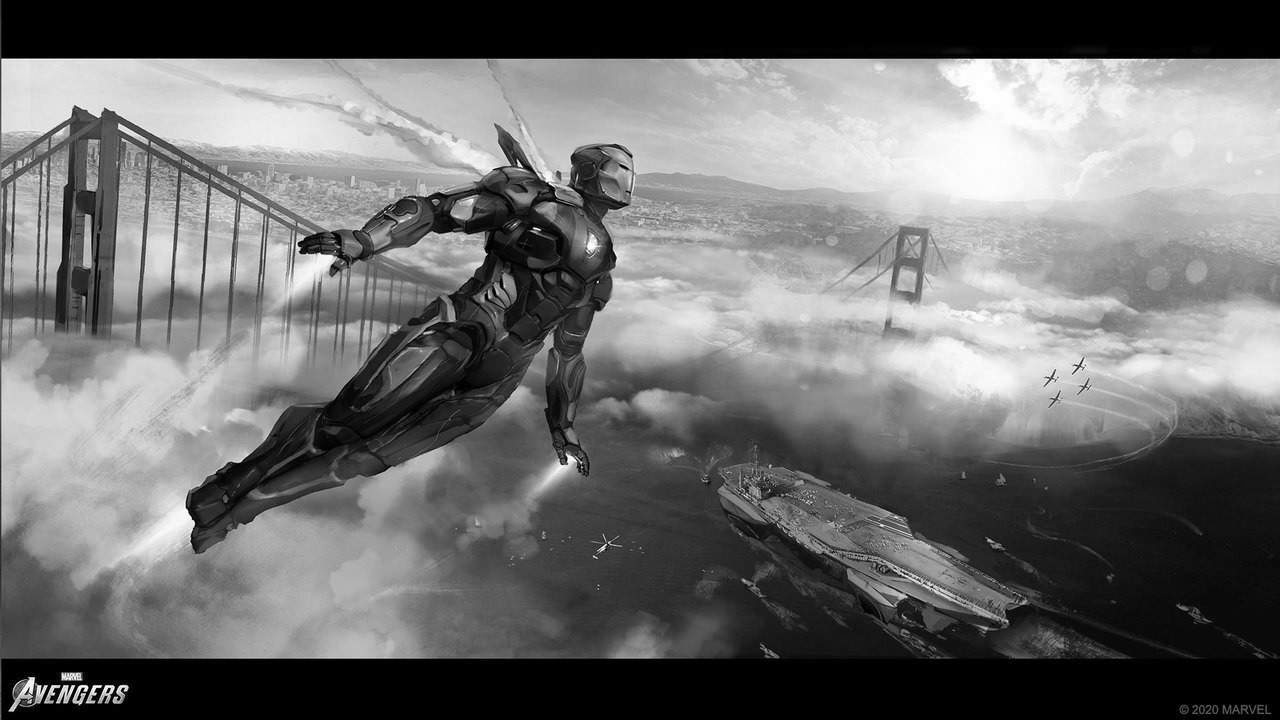

In [153]:
Image.fromarray(normimg)

In [182]:
from scipy import signal
kernel=np.array([[ 0, 1, 0],
                   [ 1,-4, 1],
                   [ 0, 1, 0],])
out=signal.convolve2d(normimg,kernel,mode='same',boundary='symm')


In [164]:
out=out.astype('uint8')

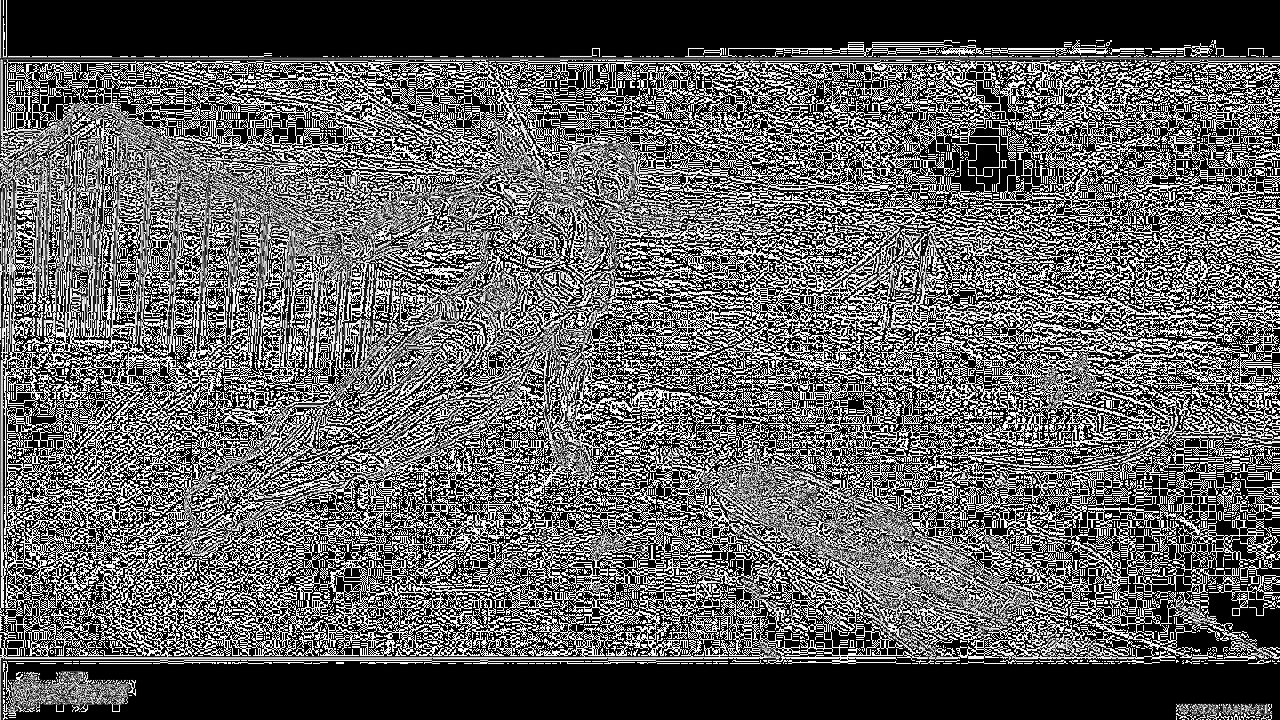

In [168]:
Image.fromarray(out)

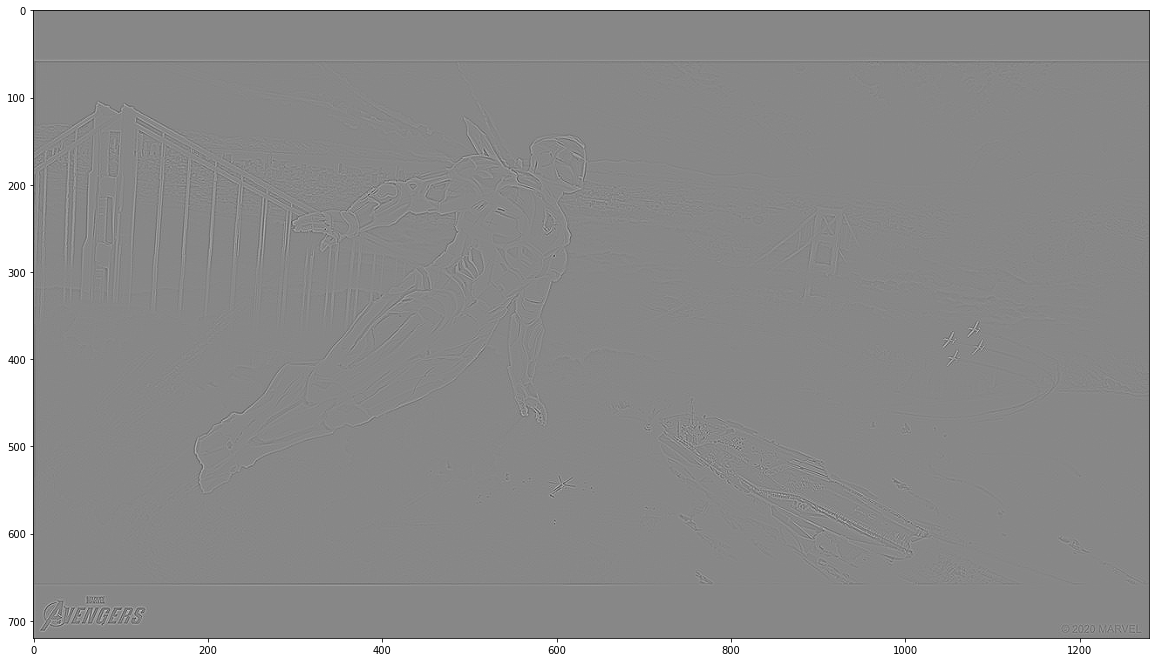

In [185]:
import matplotlib.pyplot as plt
fig,aux= plt.subplots(figsize=(20,20))
aux.imshow(out,cmap='gray')
#aux.imshow(np.absolute(out),cmap='gray')

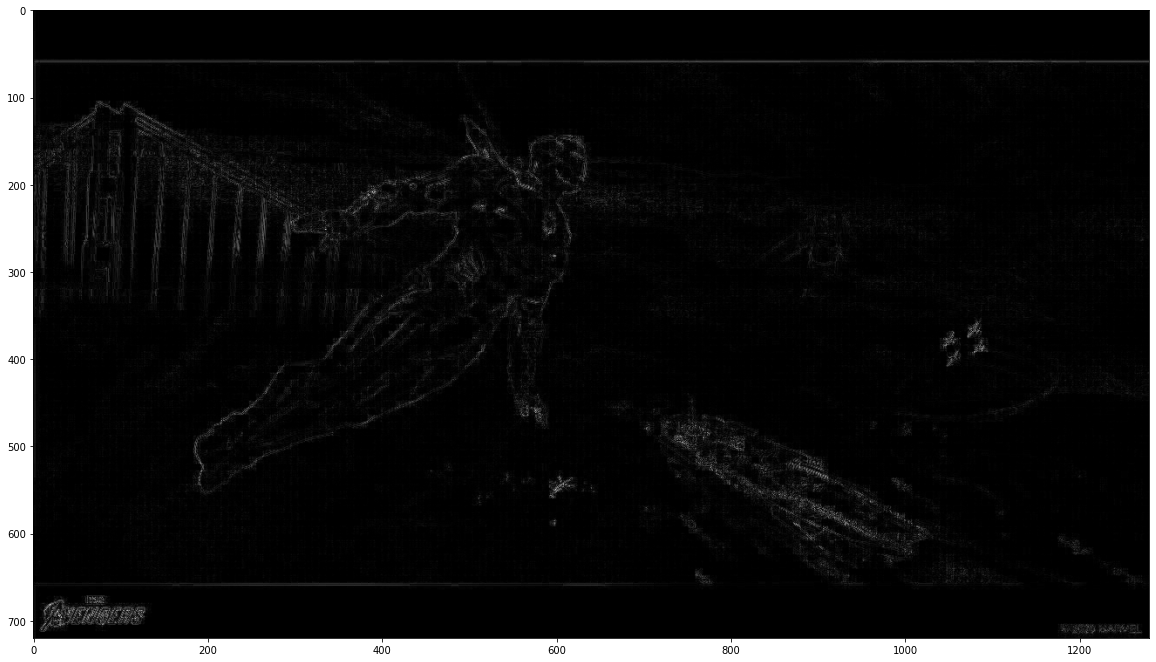

In [188]:
fig,aux= plt.subplots(figsize=(20,20))
aux.imshow(np.absolute(out),cmap='gray')

In [191]:
outdark=np.absolute(out)+100
outdark[outdark>255]=255
np.absolute(out),outdark

(array([[36, 19, 19, ...,  0,  0,  0],
        [36, 19, 19, ...,  0,  0,  0],
        [36, 19, 19, ...,  0,  0,  0],
        ...,
        [64, 36, 35, ...,  0,  0,  0],
        [52, 30, 41, ...,  0,  0,  0],
        [59, 22, 31, ...,  0,  0,  0]]),
 array([[136, 119, 119, ..., 100, 100, 100],
        [136, 119, 119, ..., 100, 100, 100],
        [136, 119, 119, ..., 100, 100, 100],
        ...,
        [164, 136, 135, ..., 100, 100, 100],
        [152, 130, 141, ..., 100, 100, 100],
        [159, 122, 131, ..., 100, 100, 100]]))

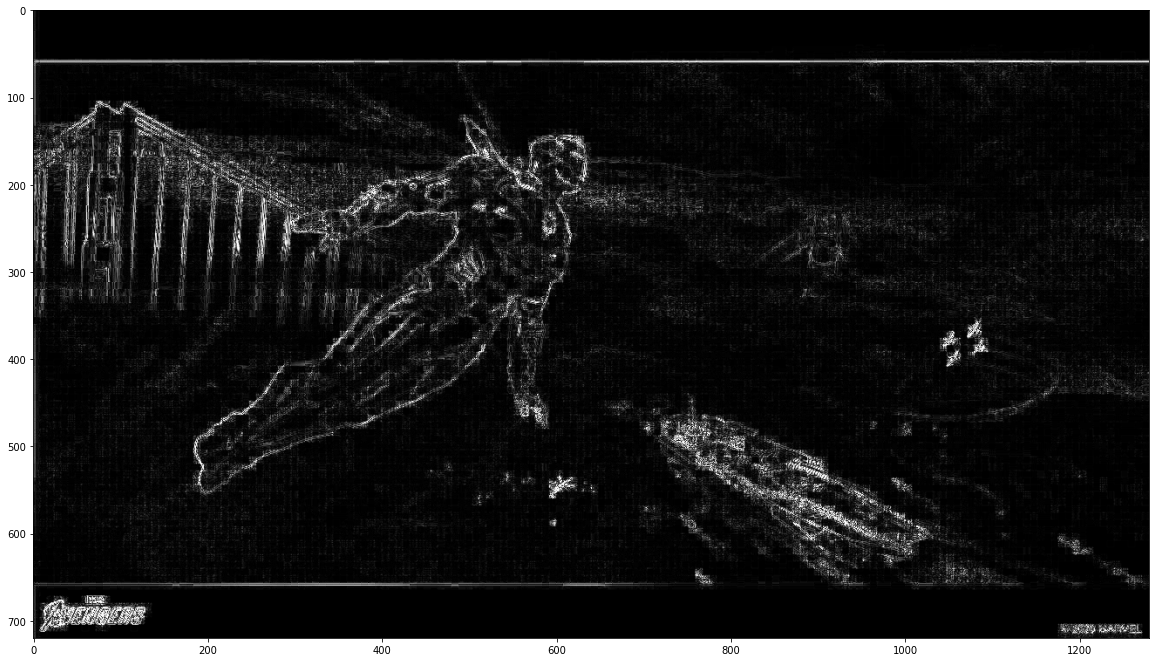

In [192]:
fig,aux= plt.subplots(figsize=(20,20))
aux.imshow(np.absolute(outdark),cmap='gray')

In [156]:
output=np.zeros((2,2))
(imgar[0:3,0:3]*kernel.sum())

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [79]:
imgar.shape,kernel.shape,(imgar[0,0]*kernel.sum()).shape

((720, 1280, 3), (3, 3), (3,))